In [10]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
df = pd.read_csv("../code/data/as-skitter.hpairs.space.csv")

# add new columns for lastLayer w/o inter
for prefix in ['nodes','edges','dfsNodes','dfsEdges']:
    for dir in ['S','T']:
        newName = f"{prefix}InLastLayer{dir}\inter"
        lastLayer = f"{prefix}InLastLayer{dir}"
        intersection = prefix+"InInter"
        if prefix[0:3]=='dfs' and dir=='T':
            df[newName] = [0]*len(df)
        else:
            df[newName] = df[lastLayer] - df[intersection]
        
# add flow column
df['flow'] = df['flowBefore'].shift(-1, fill_value=0) - df['flowBefore']
df['flow'] = df['flow'].clip(lower=0)

In [13]:
width = 0.3

colors = {
    'BeforeLastLayerS': 'r', 
    'InLastLayerS\inter': 'c', 
    'InInter': 'y', 
    'InLastLayerT\inter': 'b', 
    'BeforeLastLayerT': 'g',
    
    'lastLayerS': 'r',
    'lastLayerT': 'g',
    
    'distOfSink': 'b',
    'flow': 'k',
    'ROUND': 'k',
}

spaceKeys = ['BeforeLastLayerS', 'InLastLayerS\inter', 'InInter', 'InLastLayerT\inter', 'BeforeLastLayerT']
spaceKeysNodes = ['nodes'+ key for key in spaceKeys]
spaceKeysEdges = ['edges'+ key for key in spaceKeys]
spaceKeys2 = ['BeforeLastLayerS', 'InInter', 'BeforeLastLayerT']
spaceKeysNodes2 = ['nodes'+ key for key in spaceKeys2]
spaceKeysEdges2 = ['edges'+ key for key in spaceKeys2]

for key in spaceKeys:
    colors['nodes'+key] = colors[key]
    colors['edges'+key] = colors[key]

# labels are just keys for now except space keys where prefix is omitted
labels = {}
for key in colors.keys():
    labels[key] = key
for key in spaceKeys:
    labels['nodes'+key] = key
    labels['edges'+key] = key
    
def addBars(ax,data,keys,addLabels=True, pos=None):
    heights = pd.Series([0]*len(data), index=data.index)
    if not pos:
        pos = range(len(data))
    for key in keys:
        ax.bar(pos, data[key], width, color=colors[key], bottom=heights, label=labels[key] if addLabels else '')
        heights = heights + data[key]

stats for flow between 24637 and 416308
deg S       124
deg T       433
total flow  123


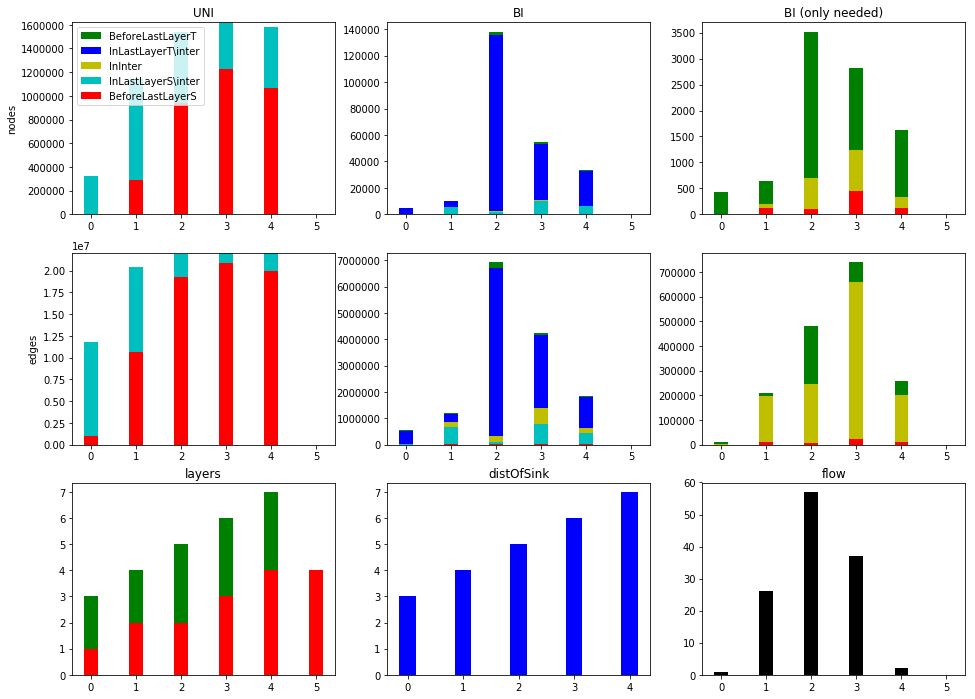

stats for flow between 169161 and 219033
deg S       158
deg T       169
total flow  158


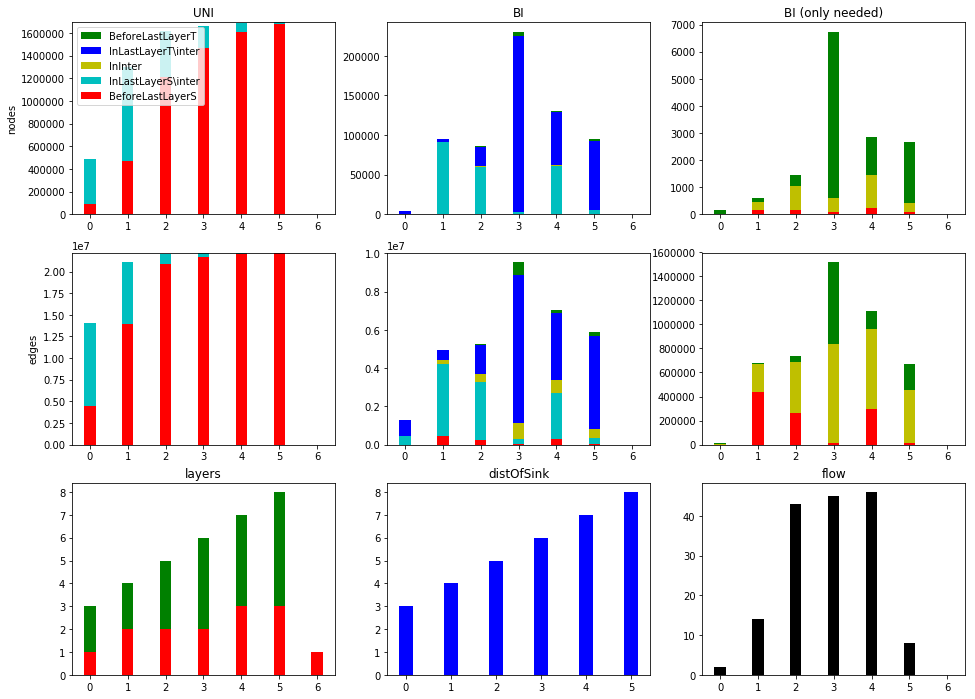

stats for flow between 200409 and 10166
deg S       764
deg T       272
total flow  272


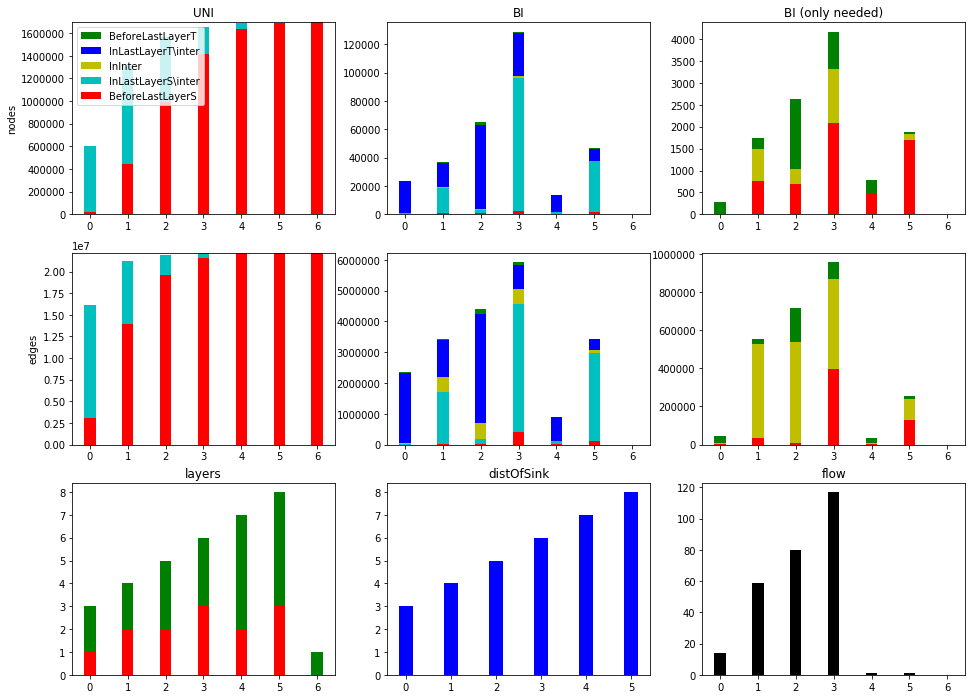

stats for flow between 203670 and 199151
deg S       161
deg T       116
total flow  116


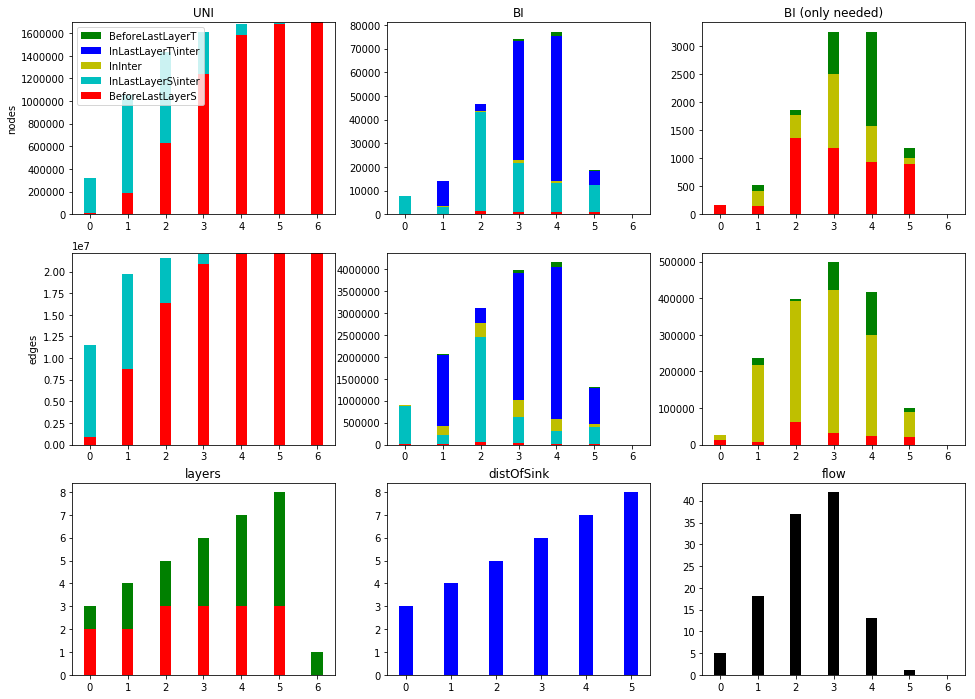

stats for flow between 210721 and 594479
deg S       157
deg T       186
total flow  152


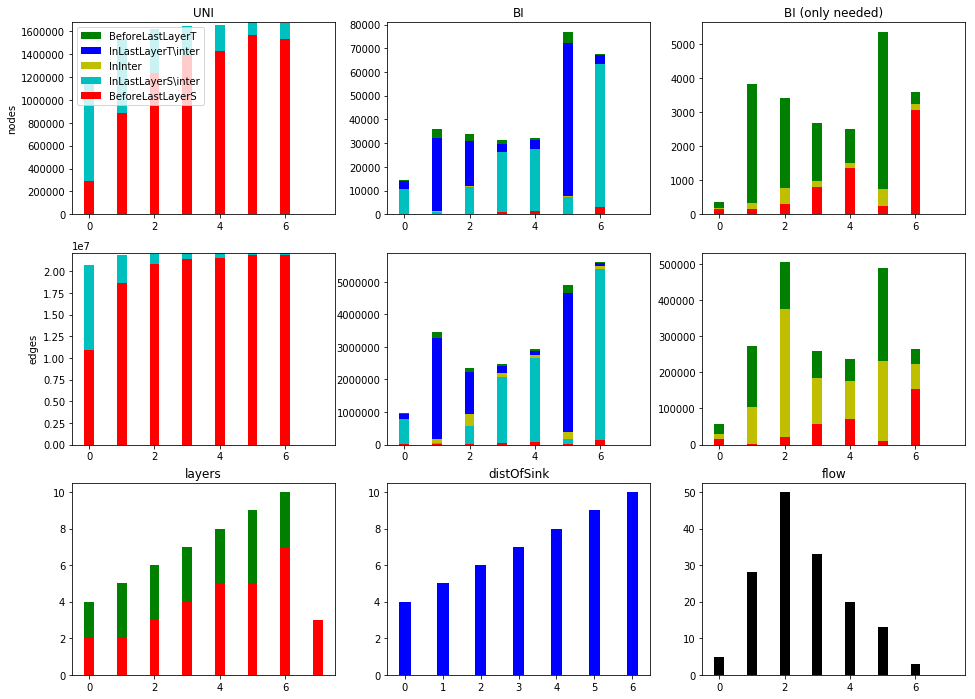

stats for flow between 257937 and 231442
deg S       162
deg T       248
total flow  162


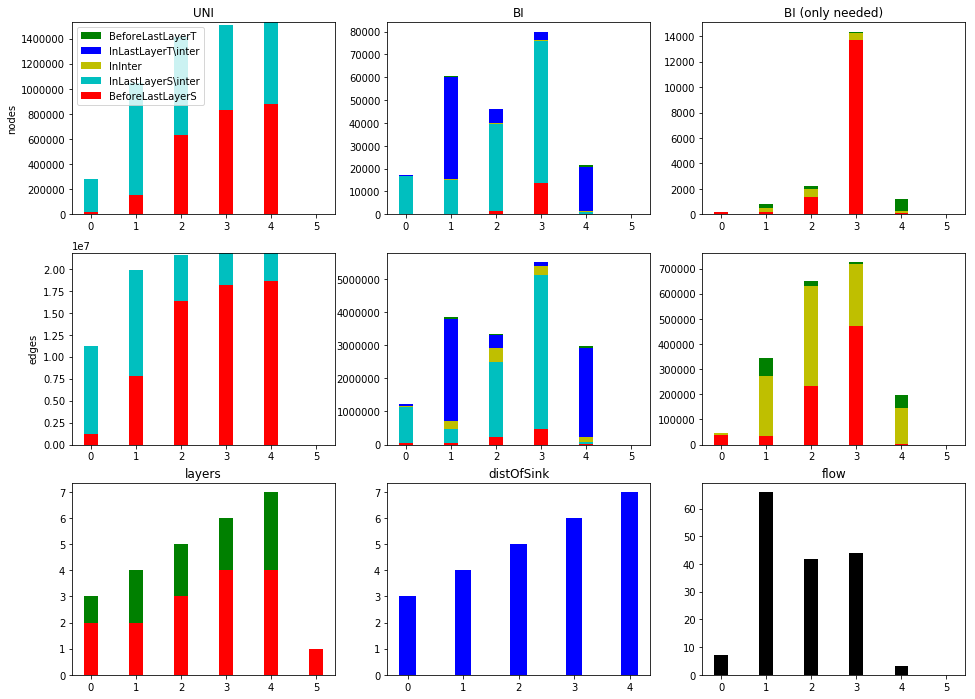

stats for flow between 275125 and 169201
deg S       114
deg T       659
total flow  114


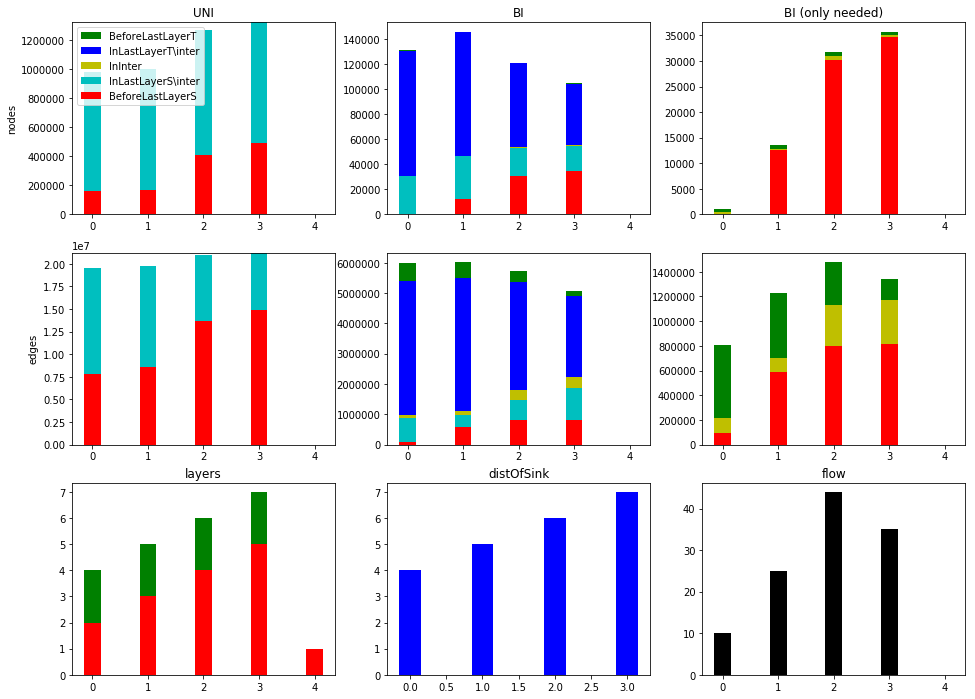

stats for flow between 507711 and 508023
deg S       307
deg T       225
total flow  225


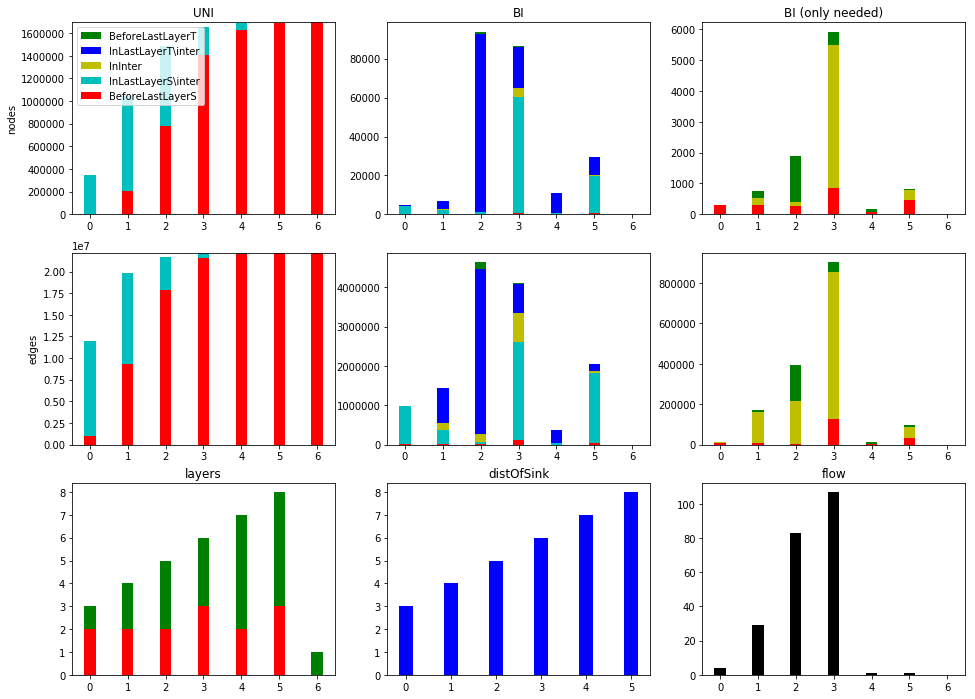

stats for flow between 512441 and 831
deg S       163
deg T       419
total flow  163


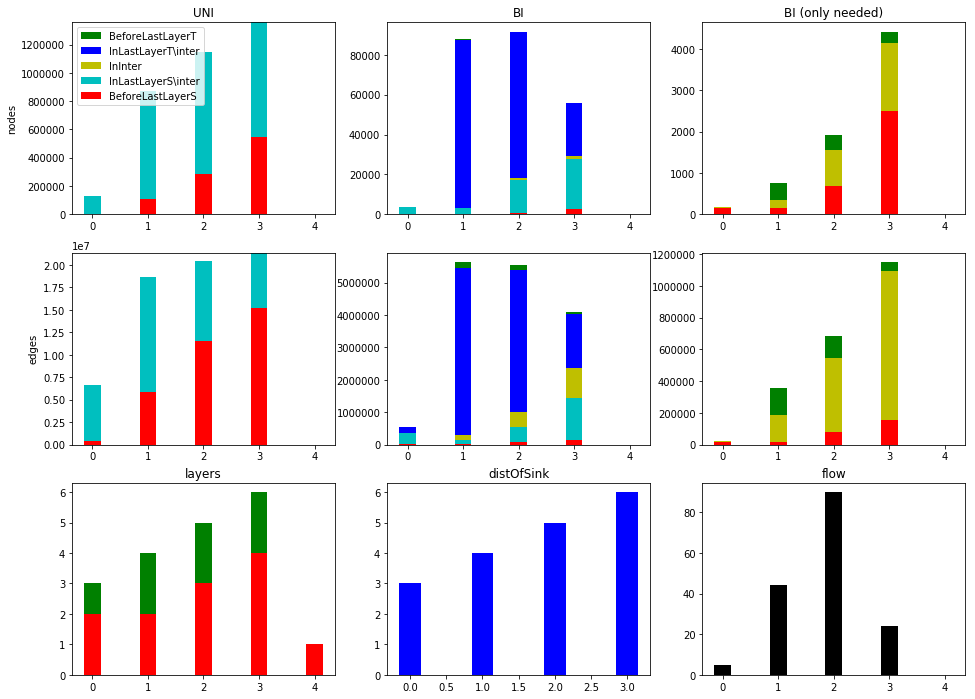

stats for flow between 1041213 and 35176
deg S       162
deg T       327
total flow  129


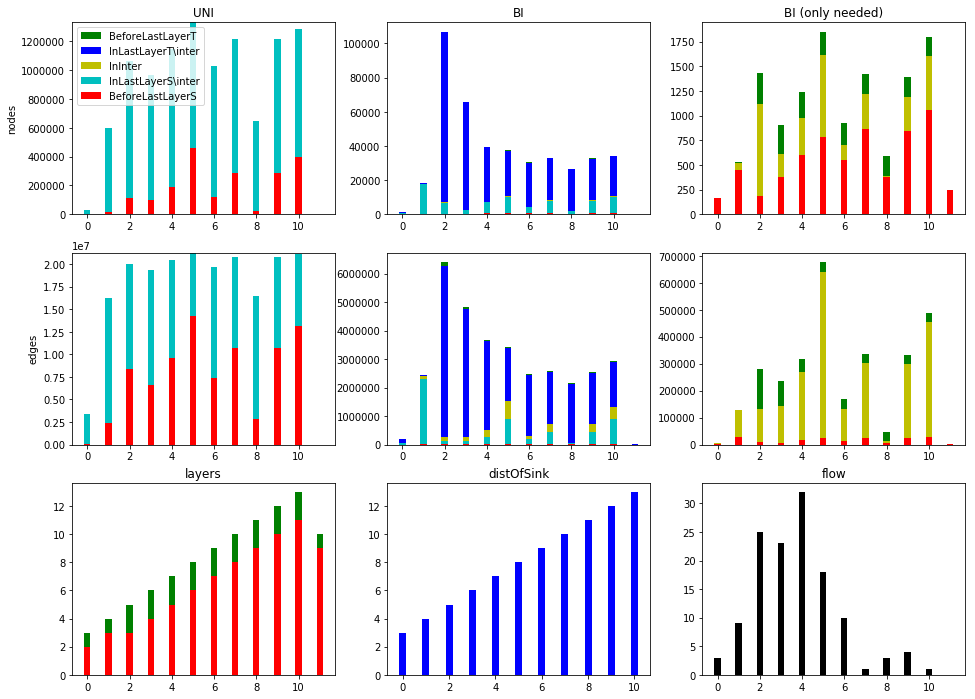

In [6]:
for (s,t), pair_data in df.groupby(['S','T']):
    print(f'stats for flow between {s} and {t}')
    print(f'deg S       {pair_data.SDEG.iloc[0]}')
    print(f'deg T       {pair_data.TDEG.iloc[0]}')
    print(f'total flow  {pair_data.flow.sum()//2}')
    
    fig, axs = plt.subplots(3,3, figsize=(16,12))
    axs[0][0].set_title('UNI')
    axs[0][1].set_title('BI')
    axs[0][2].set_title('BI (only needed)')
    axs[0][0].set_ylabel('nodes')
    axs[1][0].set_ylabel('edges')
    axs[2][0].set_title('layers')
    axs[2][1].set_title('distOfSink')
    axs[2][2].set_title('flow')

    for dir, run in pair_data.groupby(['DIRECTION']):
        if dir=='UNI':    
            addBars(axs[0][0],run,keys=spaceKeysNodes)
            addBars(axs[1][0],run,keys=spaceKeysEdges)
        else:
            addBars(axs[0][1],run,keys=spaceKeysNodes)
            addBars(axs[1][1],run,keys=spaceKeysEdges)

            addBars(axs[0][2],run,keys=spaceKeysNodes2)
            addBars(axs[1][2],run,keys=spaceKeysEdges2)

            # not space stats
            addBars(axs[2][0],run,keys=['lastLayerS','lastLayerT'])
            addBars(axs[2][1],run[:-1],keys=['distOfSink']) # drop last round here
            addBars(axs[2][2],run,keys=['flow'])
            
    h, l = axs[0][0].get_legend_handles_labels()
    axs[0][0].legend(h[::-1], l[::-1], loc='upper left')
    plt.show()

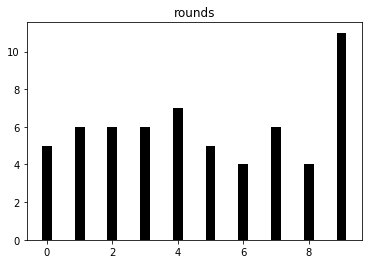

In [7]:
fig, ax = plt.subplots()
addBars(ax,df[df.DIRECTION=='BI'].groupby(['S','T']).max(),keys=['ROUND'])
ax.set_title('rounds')
plt.show()

pairs       10
avg SDEG    229.0142857142857
avg TDEG    290.8857142857143
avg rounds  7.0
avg flow/R  23.057142857142857


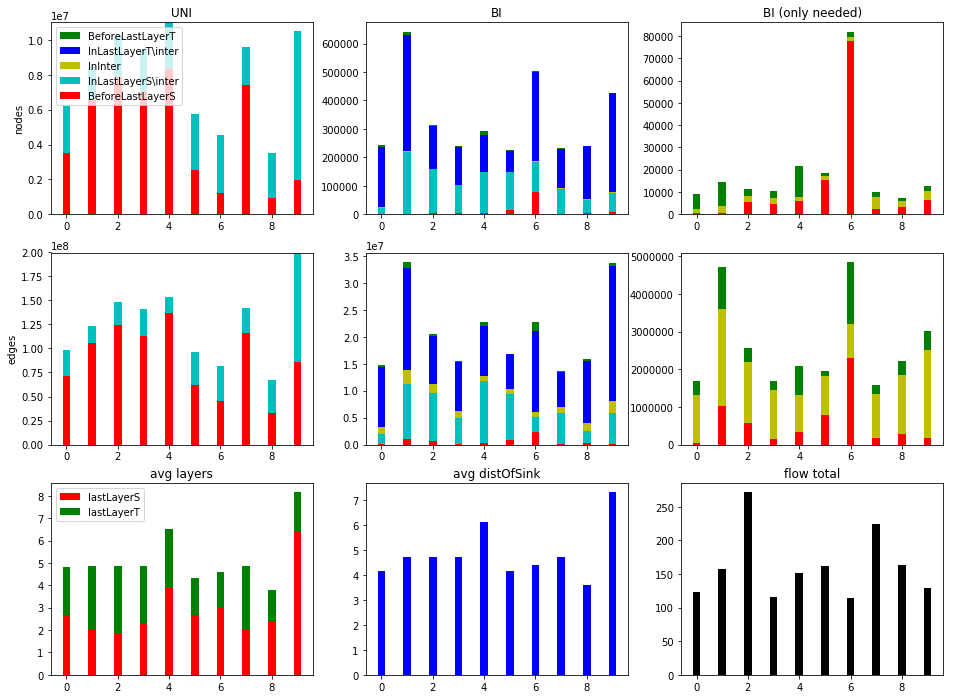

In [14]:
dfBIbyST = df[df.DIRECTION=='BI'].groupby(['S','T'])
print('pairs      ', len(dfBIbyST))
print('avg SDEG   ', df['SDEG'].mean())
print('avg TDEG   ', df['TDEG'].mean())
print('avg rounds ', dfBIbyST.ROUND.max().add(1).mean())
print('avg flow/R ', df[df.DIRECTION=='BI'].flow.mean())

fig, axs = plt.subplots(3,3, figsize=(16,12))
axs[0][0].set_title('UNI')
axs[0][1].set_title('BI')
axs[0][2].set_title('BI (only needed)')
axs[0][0].set_ylabel('nodes')
axs[1][0].set_ylabel('edges')
axs[2][0].set_title('avg layers')
axs[2][1].set_title('avg distOfSink')
axs[2][2].set_title('flow total')

for dir, data in df.groupby(['DIRECTION']):
    aggregated = data.groupby(['S','T']).sum()
    num_pairs = len(aggregated)
    if dir=='UNI':    
        addBars(axs[0][0],aggregated,keys=spaceKeysNodes)
        addBars(axs[1][0],aggregated,keys=spaceKeysEdges)
    else:
        addBars(axs[0][1],aggregated,keys=spaceKeysNodes)
        addBars(axs[1][1],aggregated,keys=spaceKeysEdges)
        
        addBars(axs[0][2],aggregated,keys=spaceKeysNodes2)
        addBars(axs[1][2],aggregated,keys=spaceKeysEdges2)
        
        # not space stats
        aggregated2 = data.groupby(['S','T']).mean()
        addBars(axs[2][0],aggregated2,keys=['lastLayerS','lastLayerT'])
        addBars(axs[2][1],aggregated2,keys=['distOfSink'])
        addBars(axs[2][2],aggregated,keys=['flow'])
        
        
# draw legend for topleft plot reversed
h, l = axs[0][0].get_legend_handles_labels()
axs[0][0].legend(h[::-1], l[::-1], loc='upper left')
axs[2][0].legend(loc='upper left')

plt.show()

In [9]:
# totalSpace

nodesUNI = df[df.DIRECTION=='UNI'][spaceKeysNodes].sum()
edgesUNI = df[df.DIRECTION=='UNI'][spaceKeysEdges].sum()
nodesBI = df[df.DIRECTION=='BI'][spaceKeysNodes2].sum()
edgesBI = df[df.DIRECTION=='BI'][spaceKeysEdges2].sum()

print('UNI')
print(nodesUNI)
print(edgesUNI)
print('total nodes visited', nodesUNI.sum())
print('total edges visited', edgesUNI.sum())
print()
print('BI')
print(nodesBI)
print(edgesBI)
print('total nodes visited', nodesBI.sum())
print('total edges visited', edgesBI.sum())
print()
print('improvement of BI over UNI')
print('nodes', nodesUNI.sum() / nodesBI.sum())
print('edges', edgesUNI.sum() / edgesBI.sum())

UNI
nodesBeforeLastLayerS      47403326
nodesInLastLayerS\inter    31926130
nodesInInter                      0
nodesInLastLayerT\inter           0
nodesBeforeLastLayerT             0
dtype: int64
edgesBeforeLastLayerS      894421569
edgesInLastLayerS\inter    356792263
edgesInInter                       0
edgesInLastLayerT\inter            0
edgesBeforeLastLayerT              0
dtype: int64
total nodes visited 79329456
total edges visited 1251213832

BI
nodesBeforeLastLayerS    123445
nodesInInter              27225
nodesBeforeLastLayerT     46683
dtype: int64
edgesBeforeLastLayerS     5830938
edgesInInter             14786391
edgesBeforeLastLayerT     5786379
dtype: int64
total nodes visited 197353
total edges visited 26403708

improvement of BI over UNI
nodes 401.9673174464032
edges 47.38780750037078
